In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
#dataset_url = "https://github.com/mankelly/ECE4317_Group_Project/raw/main/Datasets/Images.tar"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = tf.keras.utils.get_file('Images', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

793583616/793579520 [==============================] - 23s 0us/step


In [141]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

20580


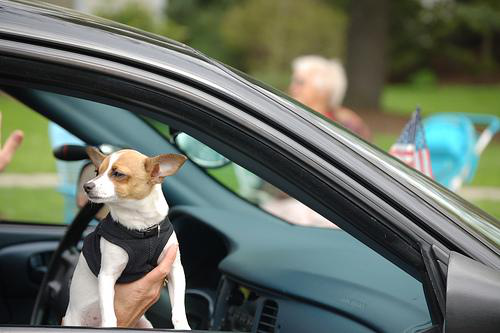

In [144]:
dog = list(data_dir.glob('n02085620-Chihuahua/*'))
PIL.Image.open(str(dog[0]))

In [159]:
batch_size = 32 #training sample number
img_height = 180
img_width = 180

In [160]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #80% training 20% validation
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [161]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [150]:
class_names = train_ds.class_names
#List of class names
#['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 
#'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 
#'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 
#'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 
#'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 
#'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 
#'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 
#'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 
#'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 
#'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 
#'n02094433-Yorkshire_terrier', 'n02095314-wire-haired_fox_terrier', 'n02095570-Lakeland_terrier', 
#'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02096294-Australian_terrier', 
#'n02096437-Dandie_Dinmont', 'n02096585-Boston_bull', 'n02097047-miniature_schnauzer', 
#'n02097130-giant_schnauzer', 'n02097209-standard_schnauzer', 'n02097298-Scotch_terrier', 
#'n02097474-Tibetan_terrier', 'n02097658-silky_terrier', 'n02098105-soft-coated_wheaten_terrier', 
#'n02098286-West_Highland_white_terrier', 'n02098413-Lhasa', 'n02099267-flat-coated_retriever', 
#'n02099429-curly-coated_retriever', 'n02099601-golden_retriever', 'n02099712-Labrador_retriever', 
#'n02099849-Chesapeake_Bay_retriever', 'n02100236-German_short-haired_pointer', 'n02100583-vizsla', 
#'n02100735-English_setter', 'n02100877-Irish_setter', 'n02101006-Gordon_setter', 'n02101388-Brittany_spaniel', 
#'n02101556-clumber', 'n02102040-English_springer', 'n02102177-Welsh_springer_spaniel', 
#'n02102318-cocker_spaniel', 'n02102480-Sussex_spaniel', 'n02102973-Irish_water_spaniel', 'n02104029-kuvasz', 
#'n02104365-schipperke', 'n02105056-groenendael', 'n02105162-malinois', 'n02105251-briard', 'n02105412-kelpie',
# 'n02105505-komondor', 'n02105641-Old_English_sheepdog', 'n02105855-Shetland_sheepdog', 'n02106030-collie', 
#'n02106166-Border_collie', 'n02106382-Bouvier_des_Flandres', 'n02106550-Rottweiler', 
#'n02106662-German_shepherd', 'n02107142-Doberman', 'n02107312-miniature_pinscher', 
#'n02107574-Greater_Swiss_Mountain_dog', 'n02107683-Bernese_mountain_dog', 'n02107908-Appenzeller', 
#'n02108000-EntleBucher', 'n02108089-boxer', 'n02108422-bull_mastiff', 'n02108551-Tibetan_mastiff', 
#'n02108915-French_bulldog', 'n02109047-Great_Dane', 'n02109525-Saint_Bernard', 'n02109961-Eskimo_dog', 
#'n02110063-malamute', 'n02110185-Siberian_husky', 'n02110627-affenpinscher', 'n02110806-basenji', 
#'n02110958-pug', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 
#'n02111889-Samoyed', 'n02112018-Pomeranian', 'n02112137-chow', 'n02112350-keeshond', 
#'n02112706-Brabancon_griffon', 'n02113023-Pembroke', 'n02113186-Cardigan', 'n02113624-toy_poodle', 
#'n02113712-miniature_poodle', 'n02113799-standard_poodle', 'n02113978-Mexican_hairless', 'n02115641-dingo', 
#'n02115913-dhole', 'n02116738-African_hunting_dog']
#rewritten class names based on classes from directory
class_names[0] = "Chihuahua"
class_names[1] = "Japanese Spaniel"
class_names[2] = "Maltese"
class_names[3] = "Pekinese"
class_names[4] = "Shih-Tzu"
class_names[5] = "Blenheim Spaniel"
class_names[6] = "Papillion"
class_names[7] = "Toy Terrier"
class_names[8] = "Rodesian Ridgeback"
class_names[9] = "Afghan Hound"
class_names[10] = "Basset"
class_names[11] = "Beagle"
class_names[12] = "Bloodhound"
class_names[13] = "Bluetick"
class_names[14] = "Black and Tan Coonhound"
class_names[15] = "Walker Hound"
class_names[16] = "English Foxhound"
class_names[17] = "Redbone"
class_names[18] = "Borzoi"
class_names[19] = "Irish Wolfhound"
class_names[20] = "Italian Greyhound"
class_names[21] = "Whippet"
class_names[22] = "Ibizan Hound"
class_names[23] = "Norwegian Elkhound"
class_names[24] = "Otterhound"
class_names[25] = "Saluki"
class_names[26] = "Scottish Deerhound"
class_names[27] = "Weimaraner"
class_names[28] = "Staffordshire Bullterrier"
class_names[29] = "American Staffordshire Terrier"
class_names[30] = "Bedlington Terrier"
class_names[31] = "Border Terrier"
class_names[32] = "Kerry Blue Terrier"
class_names[33] = "Irish Terrier"
class_names[34] = "Norfolk Terrier"
class_names[35] = "Norwich Terrier"
class_names[36] = "Yorkshire Terrier"
class_names[37] = "Wire Haired Fox Terrier"
class_names[38] = "Lakeland Terrier"
class_names[39] = "Sealyham Terrier"
class_names[40] = "Airedale"
class_names[41] = "Cairn"
class_names[42] = "Australian Terrier"
class_names[43] = "Dandie Dinmont"
class_names[44] = "Boston Bull"
class_names[45] = "Minature Schnauzer"
class_names[46] = "Giant Shnauzer"
class_names[47] = "Standard Schnauer"
class_names[48] = "Scotch Terrier"
class_names[49] = "Tibetan Terrier"
class_names[50] = "Silky Terrier"
class_names[51] = "Soft-Coated Wheaten Terrier"
class_names[52] = "West Highland White Terrier"
class_names[53] = "Lhasa"
class_names[54] = "Flat-Coated Retriever"
class_names[55] = "Curly-Coated Retriever"
class_names[56] = "Golden Retriever"
class_names[57] = "Labrador Retriever"
class_names[58] = "Chesapeake Bay Retriever"
class_names[59] = "German Short-Hared Pointer"
class_names[60] = "Vizla"
class_names[61] = "English Setter"
class_names[62] = "Irish Setter"
class_names[63] = "Gordon Setter"
class_names[64] = "Brittany Spaniel"
class_names[65] = "Clumber"
class_names[66] = "English Springer"
class_names[67] = "Welsh Springer Spaniel"
class_names[68] = "Cocker Spaniel"
class_names[69] = "Sussex Spaniel"
class_names[70] = "Irish Water Spaniel"
class_names[71] = "Kuvasz"
class_names[72] = "Schipperke"
class_names[73] = "Groenendael"
class_names[74] = "Malinois"
class_names[75] = "Briard"
class_names[76] = "Kelpie"
class_names[77] = "Komondor"
class_names[78] = "Old English Sheepdog"
class_names[79] = "Shetland Sheepdog"
class_names[80] = "Collie"
class_names[81] = "Border Collie"
class_names[82] = "Bouvier des Flandres"
class_names[83] = "Rottweiler"
class_names[84] = "German Shepherd"
class_names[85] = "Doberman"
class_names[86] = "Miniature Pinscher"
class_names[87] = "Greater Swiss Mountan Dog"
class_names[88] = "Bernese Mountain Dog"
class_names[89] = "Appenzeller"
class_names[90] = "EntleBucher"
class_names[91] = "Boxer"
class_names[92] = "Bull Mastiff"
class_names[93] = "Tibetan Mastiff"
class_names[94] = "French Bulldog"
class_names[95] = "Great Dane"
class_names[96] = "Saint Bernard"
class_names[97] = "Eskimo Dog"
class_names[98] = "Malamute"
class_names[99] = "Siberian Husky"
class_names[100] = "Affenpinscher"
class_names[101] = "Basenji"
class_names[102] = "Pug"
class_names[103] = "Leonberg"
class_names[104] = "Newfoundland"
class_names[105] = "Great Pyrenees"
class_names[106] = "Samoyed"
class_names[107] = "Pomerian"
class_names[108] = "Chow"
class_names[109] = "Keeshond"
class_names[110] = "Brabancon Griffon"
class_names[111] = "Pembroke"
class_names[112] = "Cardigan"
class_names[113] = "Toy Poodle"
class_names[114] = "Miniature Poodle"
class_names[115] = "Standard Poodle"
class_names[116] = "Mexican Hairless"
class_names[117] = "Dingo"
class_names[118] = "Dhole"
class_names[119] = "African Hunting Dog"

print(class_names)

['Chihuahua', 'Japanese Spaniel', 'Maltese', 'Pekinese', 'Shih-Tzu', 'Blenheim Spaniel', 'Papillion', 'Toy Terrier', 'Rodesian Ridgeback', 'Afghan Hound', 'Basset', 'Beagle', 'Bloodhound', 'Bluetick', 'Black and Tan Coonhound', 'Walker Hound', 'English Foxhound', 'Redbone', 'Borzoi', 'Irish Wolfhound', 'Italian Greyhound', 'Whippet', 'Ibizan Hound', 'Norwegian Elkhound', 'Otterhound', 'Saluki', 'Scottish Deerhound', 'Weimaraner', 'Staffordshire Bullterrier', 'American Staffordshire Terrier', 'Bedlington Terrier', 'Border Terrier', 'Kerry Blue Terrier', 'Irish Terrier', 'Norfolk Terrier', 'Norwich Terrier', 'Yorkshire Terrier', 'Wire Haired Fox Terrier', 'Lakeland Terrier', 'Sealyham Terrier', 'Airedale', 'Cairn', 'Australian Terrier', 'Dandie Dinmont', 'Boston Bull', 'Minature Schnauzer', 'Giant Shnauzer', 'Standard Schnauer', 'Scotch Terrier', 'Tibetan Terrier', 'Silky Terrier', 'Soft-Coated Wheaten Terrier', 'West Highland White Terrier', 'Lhasa', 'Flat-Coated Retriever', 'Curly-Coat

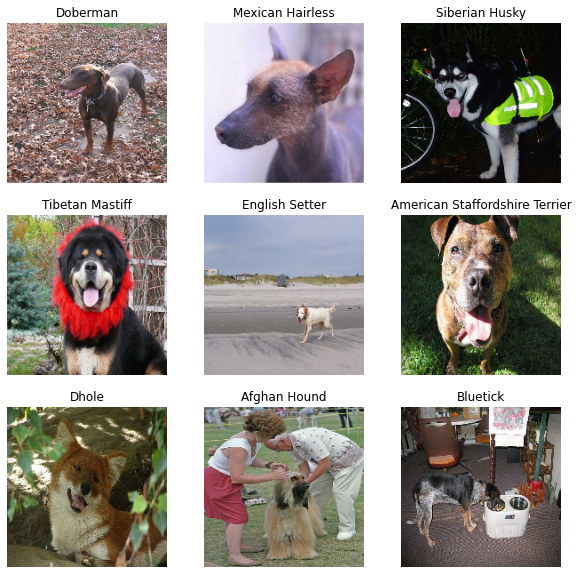

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [152]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [153]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [154]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.8973965


In [173]:
num_classes = 120

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
  layers.Flatten()
])

In [174]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [1]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


NameError: ignored

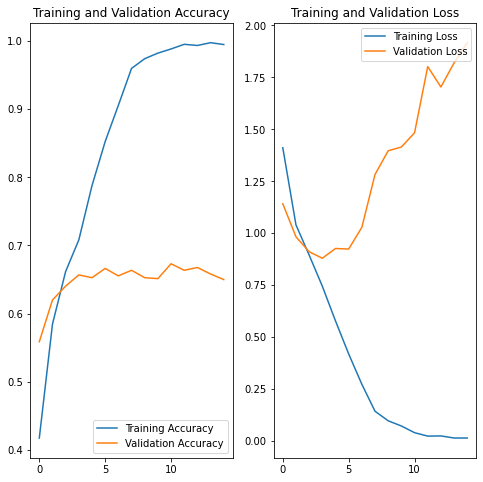

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [48]:
#test images with trained CNN
#list of test images found on https://github.com/mankelly/ECE4317_Group_Project/blob/main/Datasets/Test_Images.txt
image_url = "https://c5.staticflickr.com/5/4034/4395303654_3e600f5764_o.jpg"
image_path = tf.keras.utils.get_file('Dog1', origin=image_url)

img = keras.preprocessing.image.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to roses with a 97.54 percent confidence.
